In [1]:
!pip install opencv-contrib-python==4.8.0.76

In [2]:
import cv2
cv2.__version__

'4.8.0'

In [3]:
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define parameters for the CharucoBoard
num_squares_x = 7
num_squares_y = 10
square_length = 0.04  # length of each square side in meters
marker_length = 0.02  # length of the markers in meters
dictionary = aruco.getPredefinedDictionary(aruco.DICT_5X5_1000)  # you can choose a different dictionary

# Define a nonzero start ID for aruco markers
start_id = 200

# Create CharucoBoard with a nonzero start ID
board1 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=np.arange(start_id, start_id+num_squares_x*num_squares_y//2, dtype=np.int32)
)

board2 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=board1.getIds() + len(board1.getIds()),
)

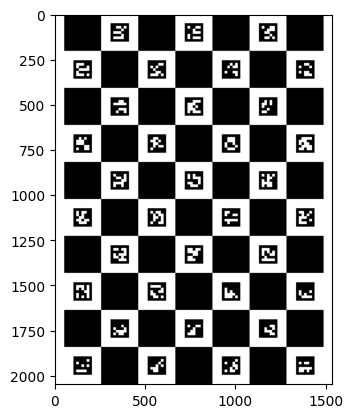

In [5]:
img1 = board1.generateImage((1536, 2048), marginSize=0)
plt.imshow(img1, cmap='gray')

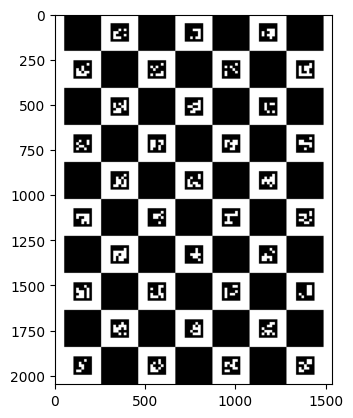

In [6]:
img2 = board2.generateImage((1536, 2048), marginSize=0)
plt.imshow(img2, cmap='gray')

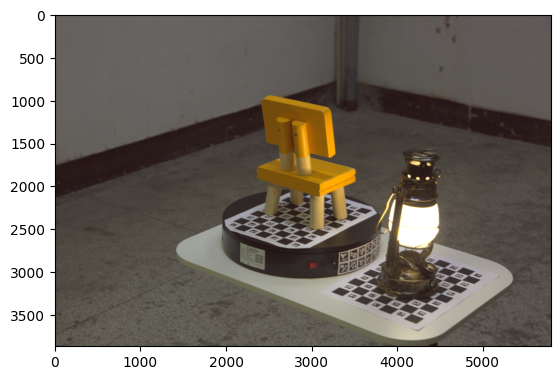

In [7]:
file= "/home/yuruihan/DS-FaceScape/hdr_emitter/merge_out_2023_12_07_180degree_ldr/IMG_0358.png"
img = cv2.imread(filename=file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
import os
hdrfiledir = "/home/yuruihan/DS-FaceScape/hdr_emitter/align_merge_out_2023_12_07_270degree_ldr"
# Vector to store 3D points 
obj_points = [] 
# Vector to store 2D points 
img_points = [] 
aruco_dict = dictionary
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners1) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners1, markerIds1, gray, board1)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board1.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            if len(obj_point) >= 4:

                obj_points.append(obj_point)
                img_points.append(img_point)
                print("add {}".format(file))

add IMG_0848.png
add IMG_0855.png
add IMG_0869.png
add IMG_0876.png
add IMG_0883.png
add IMG_0897.png
add IMG_0904.png
add IMG_0918.png
add IMG_0925.png
add IMG_0932.png
add IMG_0939.png
add IMG_0953.png
add IMG_0960.png
add IMG_0981.png
add IMG_1023.png


In [9]:
import os
hdrfiledir = "/home/yuruihan/DS-FaceScape/hdr_emitter/align_merge_out_2023_12_07_270degree_ldr"
# Vector to store 3D points 
obj_points2 = [] 
# Vector to store 2D points 
img_points2 = [] 
valid_count = 0
aruco_dict = dictionary
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners2) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners2, markerIds2, gray, board2)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board2.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            valid_count += 1
            if len(obj_point) >= 4:

                obj_points2.append(obj_point)
                img_points2.append(img_point)
                print("add {}".format(file))
print(valid_count)
            


add IMG_0848.png
add IMG_0855.png
add IMG_0869.png
add IMG_0876.png
add IMG_0883.png
add IMG_0890.png
add IMG_0918.png
add IMG_0925.png
add IMG_0932.png
add IMG_0939.png
add IMG_0953.png
add IMG_0960.png
add IMG_0981.png
add IMG_0995.png
add IMG_1002.png
add IMG_1023.png
21


In [11]:
print(len(obj_points))
print(len(img_points))
print(len(obj_points2))
print(len(img_points2))

15
15
16
16


In [12]:
camera_matrix1_meta = np.array([[10899.24186336478, 0, 2889.208043628761], [0, 10899.24186336478, 1170.1156317786006], [0, 0, 1]])

In [13]:
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], camera_matrix1_meta, None)

In [14]:
ret2, camera_matrix2, dist_coeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(obj_points2, img_points2, gray.shape[::-1], camera_matrix1_meta, None)

In [27]:
camera_matrix1_meta = np.array([[10899.24186336478, 0, 2889.208043628761], [0, 10899.24186336478, 1170.1156317786006], [0, 0, 1]])

In [28]:
dist_coeffs = np.array([0.2294113741077193,.6084733644953748,-3.4269276816682868,0.0007662236845471247,-0.020879623624284742,])

array([[ 0.03109372,  0.0095084 ,  0.00307423, -0.00514509, -0.00189743]])

In [29]:
dist_coeffs2

array([[ 0.29235971,  0.96494194,  0.07878123,  0.00788037, -7.08312928]])

In [20]:
rvecs[1]

array([[0.07334374],
       [0.17519154],
       [2.48051791]])

In [21]:
rvecs2[1]

array([[-0.52932024],
       [-1.12708472],
       [-1.92692423]])

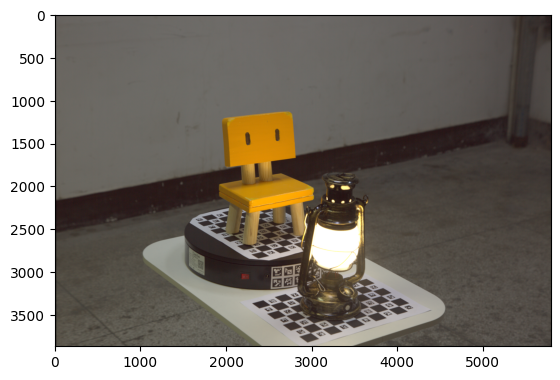

In [22]:
file= "/home/yuruihan/DS-FaceScape/hdr_emitter/align_merge_out_2023_12_07_270degree_ldr/IMG_0855.png"
img = cv2.imread(filename=file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers(img, aruco_dict)
retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners2, markerIds2, gray, board2)

In [17]:
len(rvecs2)

16

In [18]:
valid = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board1, camera_matrix, dist_coeffs, rvecs[1], tvecs[1])
valid2 = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board2, camera_matrix2, dist_coeffs2, rvecs2[1], tvecs2[1])

In [19]:
valid

(True,
 array([[-1.22505773],
        [-1.85287837],
        [-1.31887089]]),
 array([[-0.01157346],
        [ 1.71645595],
        [ 0.64871059]]))

In [20]:
valid2

(True,
 array([[-0.52932124],
        [-1.12712762],
        [-1.92688444]]),
 array([[0.0084434 ],
        [0.7833693 ],
        [2.70965521]]))

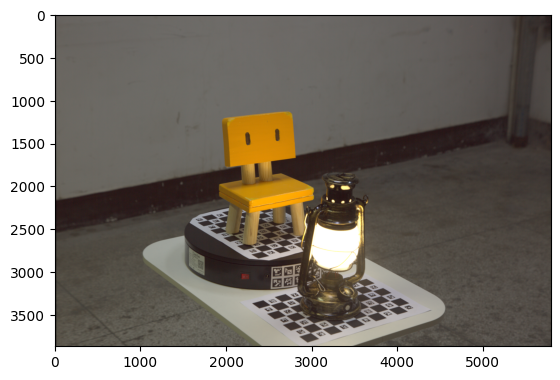

In [24]:
axis_img1 = cv2.drawFrameAxes(img.copy(), camera_matrix1_meta, dist_coeffs, rvecs[1], tvecs[1], 0.5)
plt.imshow(cv2.cvtColor(axis_img1, cv2.COLOR_BGR2RGB))


In [33]:
rvecs[1]

array([[-1.22505773],
       [-1.85287837],
       [-1.31887089]])

In [34]:
Rmat, _ = cv2.Rodrigues(rvecs[1])

In [48]:
transform_matrix = np.array([
    [0.5701484318725337, 0.5171659346878655, -0.6383338950985739, -5.678399281725953],
    [-0.7815526741070977, 0.10197882364903002, -0.6154475908826065, -1.9919190177566988],
    [-0.2531919888727424, 0.8497880415289372, 0.4623354856000981, 1.450156883713072],
    [0.0, -0.0, -0.0, 1.0]
])

# 提取平移向量
translation_vector = transform_matrix[:3, 3]
print("平移向量:")
print(translation_vector)

# 提取旋转矩阵
rotation_matrix = transform_matrix[:3, :3]
print("旋转矩阵:")
print(rotation_matrix)

# 从旋转矩阵计算旋转向量
rotation_vector, _ = cv2.Rodrigues(rotation_matrix)
print("旋转向量:")
print(rotation_vector)

平移向量:
[-5.67839928 -1.99191902  1.45015688]
旋转矩阵:
[[ 0.57014843  0.51716593 -0.6383339 ]
 [-0.78155267  0.10197882 -0.61544759]
 [-0.25319199  0.84978804  0.46233549]]
旋转向量:
[[ 1.10399919]
 [-0.29018974]
 [-0.97853496]]


In [45]:
test, _ = cv2.Rodrigues(np.array([rotation_matrix[2,1],rotation_matrix[0,2],rotation_matrix[1,0]]))

In [46]:
test

array([[ 0.56054397,  0.33967668, -0.75525507],
       [-0.80787564,  0.42474494, -0.40856908],
       [ 0.18200938,  0.8391731 ,  0.51250473]])

In [47]:
tvecs2[1]

array([[0.0084434 ],
       [0.7833693 ],
       [2.70965521]])

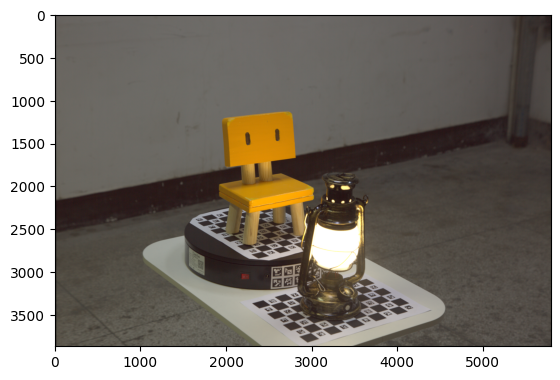

In [27]:
axis_img1 = cv2.drawFrameAxes(img.copy(), camera_matrix1_meta, dist_coeffs, rvecs[1], tvecs[1], 1)
plt.imshow(cv2.cvtColor(axis_img1, cv2.COLOR_BGR2RGB))

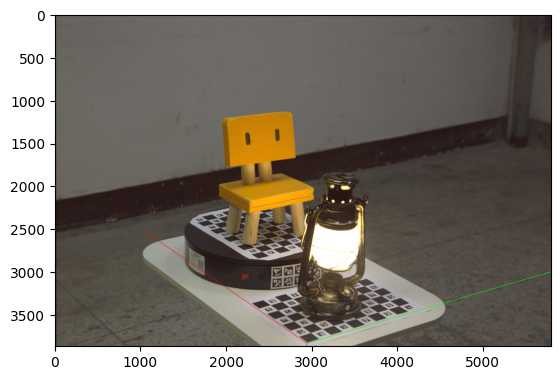

In [25]:
axis_img2 = cv2.drawFrameAxes(img.copy(), camera_matrix1_meta, dist_coeffs2, rvecs2[1], tvecs2[1], 1)
plt.imshow(cv2.cvtColor(axis_img2, cv2.COLOR_BGR2RGB))

In [82]:
# save the axis_img2
cv2.imwrite("/buffer/yuruihan/HDRutils/opencv/IMG_0855_axis.png", axis_img2)

True

In [91]:
cv2.Rodrigues(valid[1])

(array([[-0.43252105,  0.89909448,  0.06748825],
        [ 0.3581721 ,  0.10264566,  0.92799602],
        [ 0.82742872,  0.42555022, -0.36642697]]),
 array([[-0.33122396, -0.1127979 , -0.62003931, -0.62279174,  0.47106378,
          0.18827018,  0.09644975,  0.12469342,  0.36260597],
        [ 0.52532126,  0.26624535, -0.18028653, -0.50511141, -0.31381598,
          0.2296655 ,  0.49325013, -0.48682357,  0.54843518],
        [ 0.37392142,  0.22593577, -0.61356922,  0.08702783,  0.50713717,
         -0.08968398,  0.15778754, -0.59967782, -0.34013622]]))

In [106]:
import numpy as np

# 定义向量
vector = np.array([[0.0], [0.0], [1.0]])

# 定义变换矩阵1
valid1_rotation,_ = cv2.Rodrigues(valid[2])

# 定义变换矩阵2
valid2_rotation,_ = cv2.Rodrigues(valid2[2])

# 在变换1下计算向量的新方向
new_vector1 = np.dot(valid1_rotation, vector)

# 在变换2下计算向量的新方向
new_vector2 = np.dot(valid2_rotation, vector)

# 计算两个新向量之间的夹角（以弧度为单位）
angle_rad = np.arccos(np.dot(new_vector1.flatten(), new_vector2.flatten()) / (np.linalg.norm(new_vector1) * np.linalg.norm(new_vector2)))

# 将弧度转换为角度
angle_deg = np.degrees(angle_rad)

print("夹角（弧度）：", angle_rad)
print("夹角（角度）：", angle_deg)

夹角（弧度）： 1.3535134125694854
夹角（角度）： 77.55060605458087


In [20]:
import os
hdrfiledir = "/home/yuruihan/DS-FaceScape/hdr_emitter/align_merge_out_2023_12_07_90degree_ldr"
file = "IMG_0316.png"
img = cv2.imread(os.path.join(hdrfiledir, file))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
aruco_dict = dictionary
markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, aruco_dict)
if len(markerCorners1) == 0:
    print("no marker")
else:
    retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners1, markerIds1, gray, board1)
    if charuco_corners is not None and charuco_ids is not None:
        obj_point,img_point= board2.matchImagePoints(
            charuco_corners, charuco_ids,
        )
    print(len(obj_point))

3


In [21]:
imgCopy = img.copy()
img_h = img.shape[0]
img_w = img.shape[1]
imgCopy_climped = imgCopy[int(img_h*7/10):img_h*10//10, img_w//10:img_w*5//10]
markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(imgCopy_climped, aruco_dict)
cv2.aruco.drawDetectedMarkers(imgCopy_climped, markerCorners1, markerIds1)
# save the image
cv2.imwrite("detected_markers.png", imgCopy_climped)


True

In [22]:
imgCopy = img.copy()
img_h = img.shape[0]
img_w = img.shape[1]
imgCopy_climped = imgCopy
markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(imgCopy_climped, aruco_dict)
cv2.aruco.drawDetectedMarkers(imgCopy_climped, markerCorners1, markerIds1)
# save the image
cv2.imwrite("detected_markers2.png", imgCopy_climped)

True

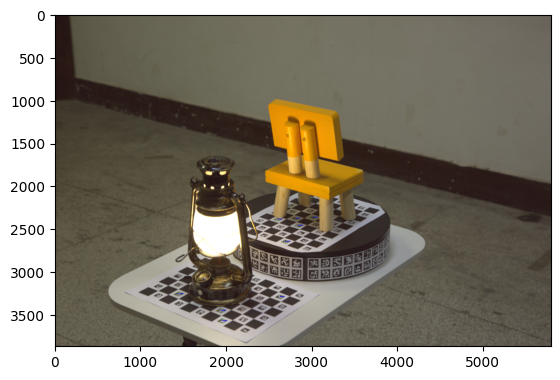

In [23]:
plt.imshow(cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB))

In [24]:
charuco_corners

array([[[2907.0217, 2379.1936]],

       [[2701.1182, 2389.8003]],

       [[2821.4429, 2426.2844]]], dtype=float32)

In [25]:
rvec = np.zeros((1, 3), dtype=np.float32)
tvec = np.zeros((1, 3), dtype=np.float32)
cameraMatrix = np.eye(3, dtype=np.float32)
distCoeffs = np.zeros((5, 1), dtype=np.float32)
valid = cv2.aruco.estimatePoseCharucoBoard(charuco_corners, charuco_ids, board1, cameraMatrix, distCoeffs, rvec, tvec)

In [26]:
# import os
# os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
# exr_path = '/home/yuruihan/DS-FaceScape/hdr_emitter/merge_out_2023_12_07_180degree/IMG_0358.exr'
# hdr_img = cv2.imread(exr_path, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR)
# plt.imshow(cv2.cvtColor(hdr_img, cv2.COLOR_BGR2RGB))

In [27]:
markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, board1.getDictionary())
len(markerCorners1)

9

In [28]:
len(markerCorners1)

9